In [5]:
from dotenv import load_dotenv
import os
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

local_path = "/home/lucas/zrive-ds/data/module_2/feature_frame.csv"

In [6]:
load_dotenv()
session = boto3.Session(
    aws_access_key_id=os.getenv("AWS_ACCESS_KEY_ID"),
    aws_secret_access_key=os.getenv("AWS_SECRET_ACCESS_KEY"),
)

s3 = session.client("s3")

bucket_name = "zrive-ds-data"
path = "groceries/box_builder_dataset/feature_frame.csv"


try:
    s3.download_file(bucket_name, path, local_path)
    print(f"File downloaded succesfully.")
except Exception as e:
    print(f"File not found : {e}")

File downloaded succesfully.


In [7]:
dataset = pd.read_csv(local_path)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [9]:
dataset.tail(15)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
2880534,33826439594116,healthcarevitamins,3643179434116,3778055471236,2021-03-03 10:53:57,2021-03-03 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880535,33826439594116,healthcarevitamins,3643189461124,3395083075716,2021-03-03 11:13:32,2021-03-03 00:00:00,9,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880536,33826439594116,healthcarevitamins,3643199160452,3925018706052,2021-03-03 11:36:16,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880537,33826439594116,healthcarevitamins,3643217739908,3923447873668,2021-03-03 12:14:59,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880538,33826439594116,healthcarevitamins,3643226718340,3929955500164,2021-03-03 12:32:48,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880539,33826439594116,healthcarevitamins,3643229274244,3536923295876,2021-03-03 12:36:28,2021-03-03 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880540,33826439594116,healthcarevitamins,3643240185988,3919083962500,2021-03-03 12:54:08,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880541,33826439594116,healthcarevitamins,3643241300100,3864791220356,2021-03-03 12:56:04,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880542,33826439594116,healthcarevitamins,3643247394948,3908686545028,2021-03-03 13:06:52,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392
2880543,33826439594116,healthcarevitamins,3643252899972,5029635227780,2021-03-03 13:15:57,2021-03-03 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,34.0,27.451392


In [10]:
missing_values = dataset.isnull().sum()
print(missing_values)

variant_id                          0
product_type                        0
order_id                            0
user_id                             0
created_at                          0
order_date                          0
user_order_seq                      0
outcome                             0
ordered_before                      0
abandoned_before                    0
active_snoozed                      0
set_as_regular                      0
normalised_price                    0
discount_pct                        0
vendor                              0
global_popularity                   0
count_adults                        0
count_children                      0
count_babies                        0
count_pets                          0
people_ex_baby                      0
days_since_purchase_variant_id      0
avg_days_to_buy_variant_id          0
std_days_to_buy_variant_id          0
days_since_purchase_product_type    0
avg_days_to_buy_product_type        0
std_days_to_

In [11]:
dataset.describe()

,variant_id,order_id,user_id,user_order_seq,outcome,ordered_before,abandoned_before,active_snoozed,set_as_regular,normalised_price,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
count,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,...,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06,2.880549e+06
mean,3.401250e+13,2.978388e+12,3.750025e+12,3.289342e+00,1.153669e-02,2.113868e-02,6.092589e-04,2.290188e-03,3.629864e-03,1.272808e-01,...,5.492182e-02,3.538562e-03,5.134091e-02,2.072549e+00,3.312961e+01,3.523734e+01,2.645304e+01,3.143513e+01,3.088810e+01,2.594969e+01
std,2.786246e+11,2.446292e+11,1.775710e+11,2.140176e+00,1.067876e-01,1.438466e-01,2.467565e-02,4.780109e-02,6.013891e-02,1.268378e-01,...,3.276586e-01,5.938048e-02,3.013646e-01,3.943659e-01,3.707162e+00,1.057766e+01,7.168323e+00,1.227511e+01,4.330262e+00,3.278860e+00
min,3.361529e+13,2.807986e+12,3.046041e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.599349e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.414214e+00,0.000000e+00,7.000000e+00,2.828427e+00
25%,3.380354e+13,2.875152e+12,3.745901e+12,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.394416e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.000000e+01,2.319372e+01,3.000000e+01,2.800000e+01,2.427618e+01
50%,3.397325e+13,2.902856e+12,3.812775e+12,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.105178e-02,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,3.400000e+01,2.769305e+01,3.000000e+01,3.100000e+01,2.608188e+01
75%,3.428495e+13,2.922034e+12,3.874925e+12,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.352670e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,3.300000e+01,4.000000e+01,3.059484e+01,3.000000e+01,3.400000e+01,2.796118e+01
max,3.454300e+13,3.643302e+12,5.029635e+12,2.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,3.000000e+00,1.000000e+00,6.000000e+00,5.000000e+00,1.480000e+02,8.400000e+01,5.868986e+01,1.480000e+02,3.950000e+01,3.564191e+01


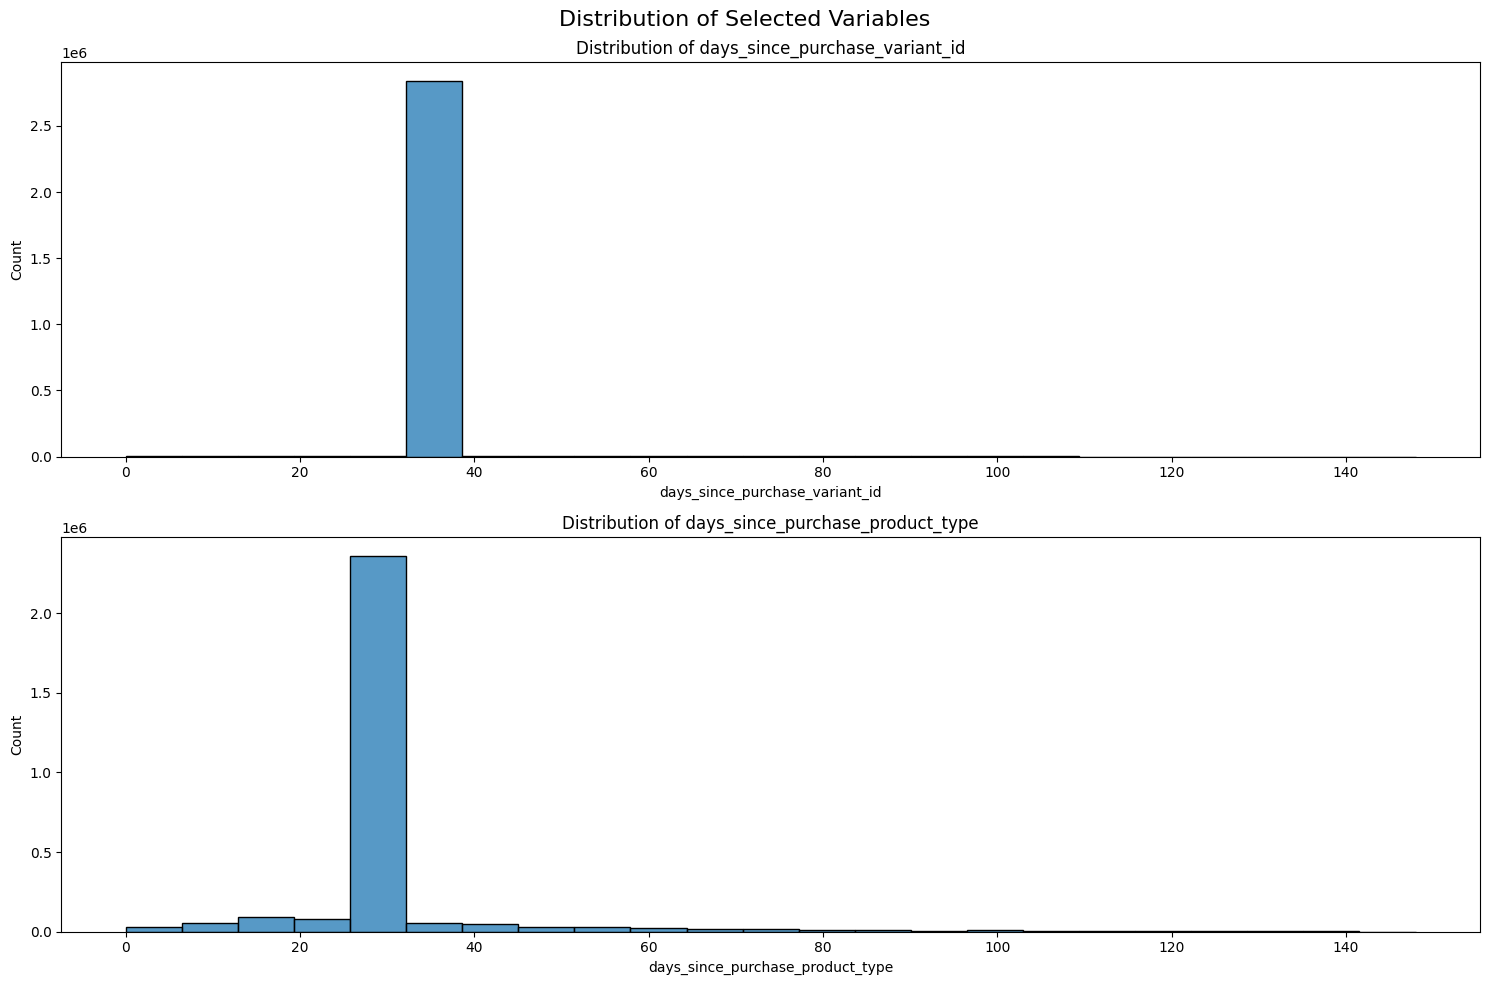

In [12]:
selected_columns = [ 'days_since_purchase_variant_id', 'days_since_purchase_product_type']

fig, axes = plt.subplots(len(selected_columns), figsize=(15, 10))
fig.suptitle('Distribution of Selected Variables', size=16)

axes = axes.ravel()

for idx, col in enumerate(selected_columns):
    sns.histplot(data=dataset, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

In [13]:
orders = dataset[dataset['outcome'] == 1]
orders.head(20)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
24,33826472919172,ricepastapulses,2811116486788,3463900528772,2020-10-08 09:31:35,2020-10-08 00:00:00,5,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
78,33826472919172,ricepastapulses,2816464388228,3781503156356,2020-10-14 15:28:26,2020-10-14 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,5.0,30.0,24.27618
142,33826472919172,ricepastapulses,2821889785988,3787000283268,2020-10-21 17:25:02,2020-10-21 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
218,33826472919172,ricepastapulses,2827451138180,3519639879812,2020-10-29 11:24:52,2020-10-29 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
239,33826472919172,ricepastapulses,2828980060292,3788931465348,2020-10-31 13:08:30,2020-10-31 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,10.0,30.0,24.27618
386,33826472919172,ricepastapulses,2835968655492,3291428749444,2020-11-10 17:32:17,2020-11-10 00:00:00,8,1.0,1.0,0.0,...,1.0,0.0,1.0,3.0,33.0,42.0,31.134053,29.0,30.0,24.27618
420,33826472919172,ricepastapulses,2837177991300,3763104120964,2020-11-12 10:20:03,2020-11-12 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
525,33826472919172,ricepastapulses,2843934425220,3768262721668,2020-11-18 23:36:23,2020-11-18 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,29.0,30.0,24.27618
559,33826472919172,ricepastapulses,2846287102084,3813032591492,2020-11-21 08:12:21,2020-11-21 00:00:00,2,1.0,0.0,1.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,18.0,30.0,24.27618
744,33826472919172,ricepastapulses,2862966407300,3436860375172,2020-12-04 15:33:31,2020-12-04 00:00:00,6,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [14]:
most_recently_bought_products = dataset.sort_values('created_at').groupby('variant_id').last().reset_index()
most_recently_bought_products.head(20)

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33615294398596,dogfood,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,30.0,22.185593,30.0,24.0,26.048133
1,33667172466820,foodstorage,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,37.5,30.498356
2,33667174301828,allpurposecleaner,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.5,30.546493,30.0,36.0,28.268085
3,33667174334596,handsoapsanitisers,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,45.0,34.062316,30.0,33.0,27.961179
4,33667174465668,handsoapsanitisers,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,27.0,28.996643,30.0,33.0,27.961179
5,33667174498436,handsoapsanitisers,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,36.0,23.924380,30.0,33.0,27.961179
6,33667174695044,bathroomlimescalecleaner,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,32.0,27.644594,30.0,33.0,26.873475
7,33667174891652,petcare,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,31.5,28.354156,30.0,31.5,28.354156
8,33667182035076,shavinggrooming,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,41.0,18.536001,30.0,35.0,27.143111
9,33667182133380,shavinggrooming,3643301986436,3914253959300,2021-03-03 14:42:05,2021-03-03 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,34.0,27.693045,30.0,35.0,27.143111


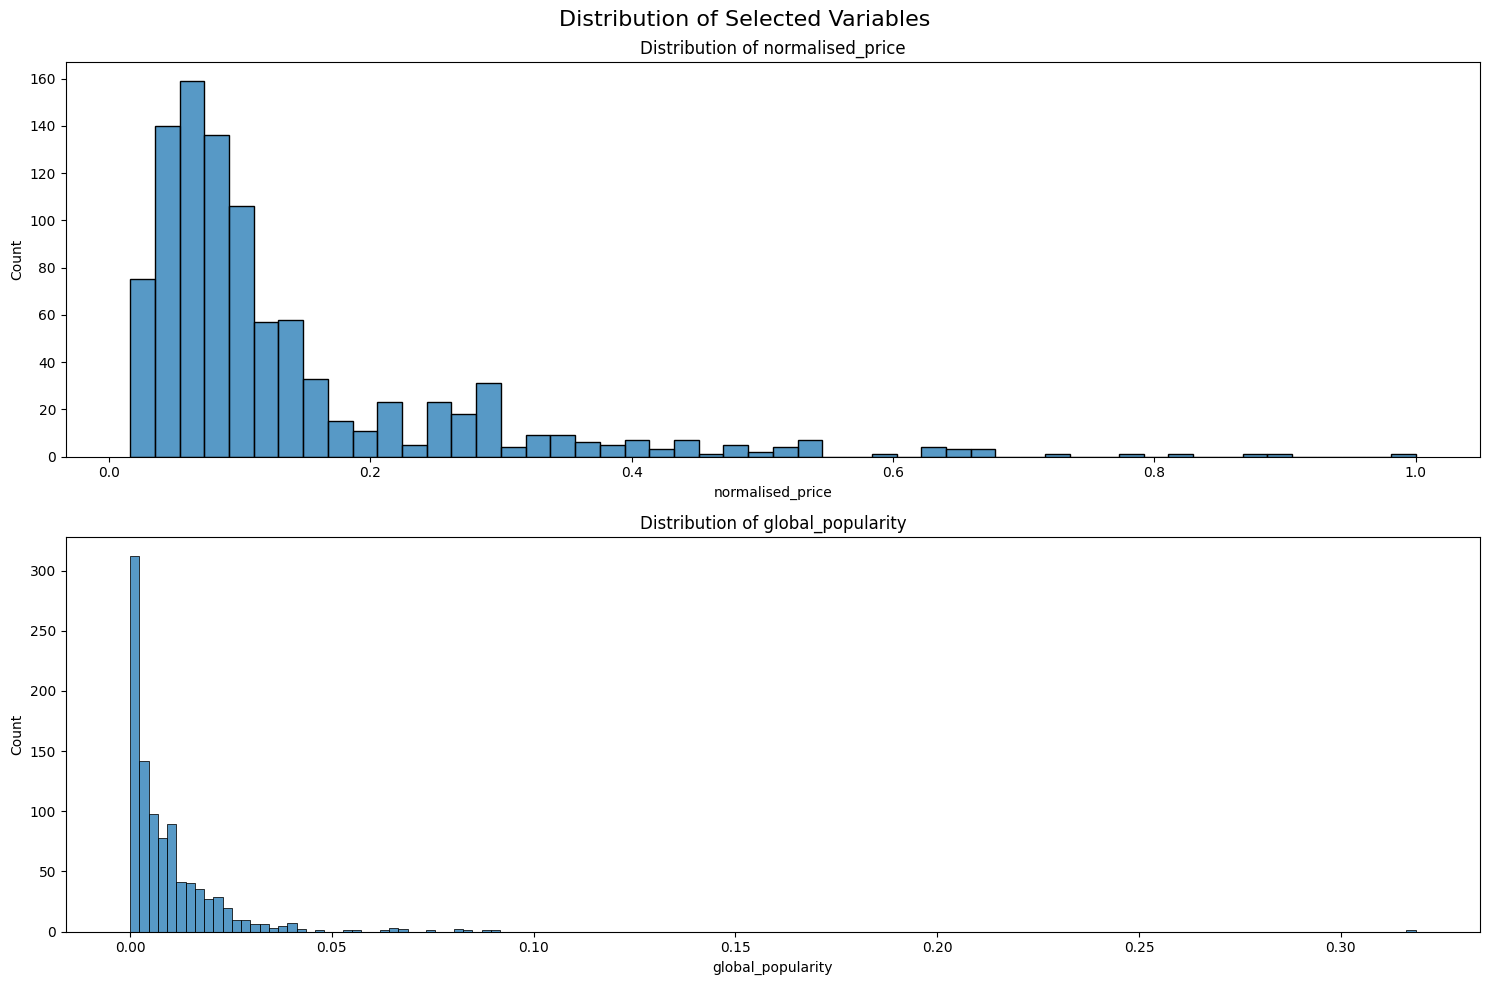


Descriptive statistics for selected variables:
       normalised_price  global_popularity
count        976.000000         976.000000
mean           0.133563           0.009387
std            0.130708           0.015211
min            0.015993           0.000000
25%            0.053944           0.001429
50%            0.085118           0.005000
75%            0.148821           0.012857
max            1.000000           0.318571


In [15]:
selected_columns = [ 'normalised_price', 'global_popularity']

fig, axes = plt.subplots(2, figsize=(15, 10))
fig.suptitle('Distribution of Selected Variables', size=16)

axes = axes.ravel()

for idx, col in enumerate(selected_columns):
    sns.histplot(data=most_recently_bought_products, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for selected variables:")
print(most_recently_bought_products[selected_columns].describe())

In [16]:
unique_recent_users = dataset.sort_values('created_at').groupby('user_id').last().reset_index()
unique_recent_users.head(20)

,user_id,variant_id,product_type,order_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,3046041190532,33826427207812,tinspackagedfoods,2889875882116,2021-01-06 19:34:36,2021-01-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,36.0,31.031362,30.0,27.0,23.827826
1,3218344935556,34368926744708,cookingsaucesmarinades,2926542815364,2021-02-20 15:00:16,2021-02-20 00:00:00,13,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,31.0,23.675321,30.0,31.0,25.535369
2,3223115595908,33826448015492,kidssnacks,3639006953604,2021-02-25 17:51:30,2021-02-25 00:00:00,16,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,20.0,11.782681,30.0,26.5,22.394709
3,3223197450372,34173018210436,dishwasherdetergent,2911165022340,2021-02-01 16:09:14,2021-02-01 00:00:00,5,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,40.0,29.572325,30.0,32.0,25.841947
4,3241962176644,34371968532612,babyfood6months,2920908685444,2021-02-13 09:48:50,2021-02-13 00:00:00,16,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,32.0,14.761436,30.0,30.0,18.973072
5,3291324416132,33667247341700,windowglasscleaner,2835547914372,2020-11-10 00:29:46,2020-11-10 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,39.0,28.767695,30.0,34.5,29.497704
6,3291330379908,33667207233668,bathroomlimescalecleaner,2928325755012,2021-02-22 23:18:51,2021-02-22 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,33.0,43.0,30.171354,30.0,33.0,26.873475
7,3291363377284,33973246492804,catfood,2824618639492,2020-10-25 15:55:18,2020-10-25 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,30.5,31.423848,30.0,27.0,27.212938
8,3291406598276,34081589035140,babyfood6months,2862721269892,2020-12-04 09:28:48,2020-12-04 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,38.0,18.792096,30.0,30.0,18.973072
9,3291425144964,33667226566788,kidsdental,2913575436420,2021-02-04 11:18:00,2021-02-04 00:00:00,6,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,29.0,56.216842,30.0,29.0,29.824487


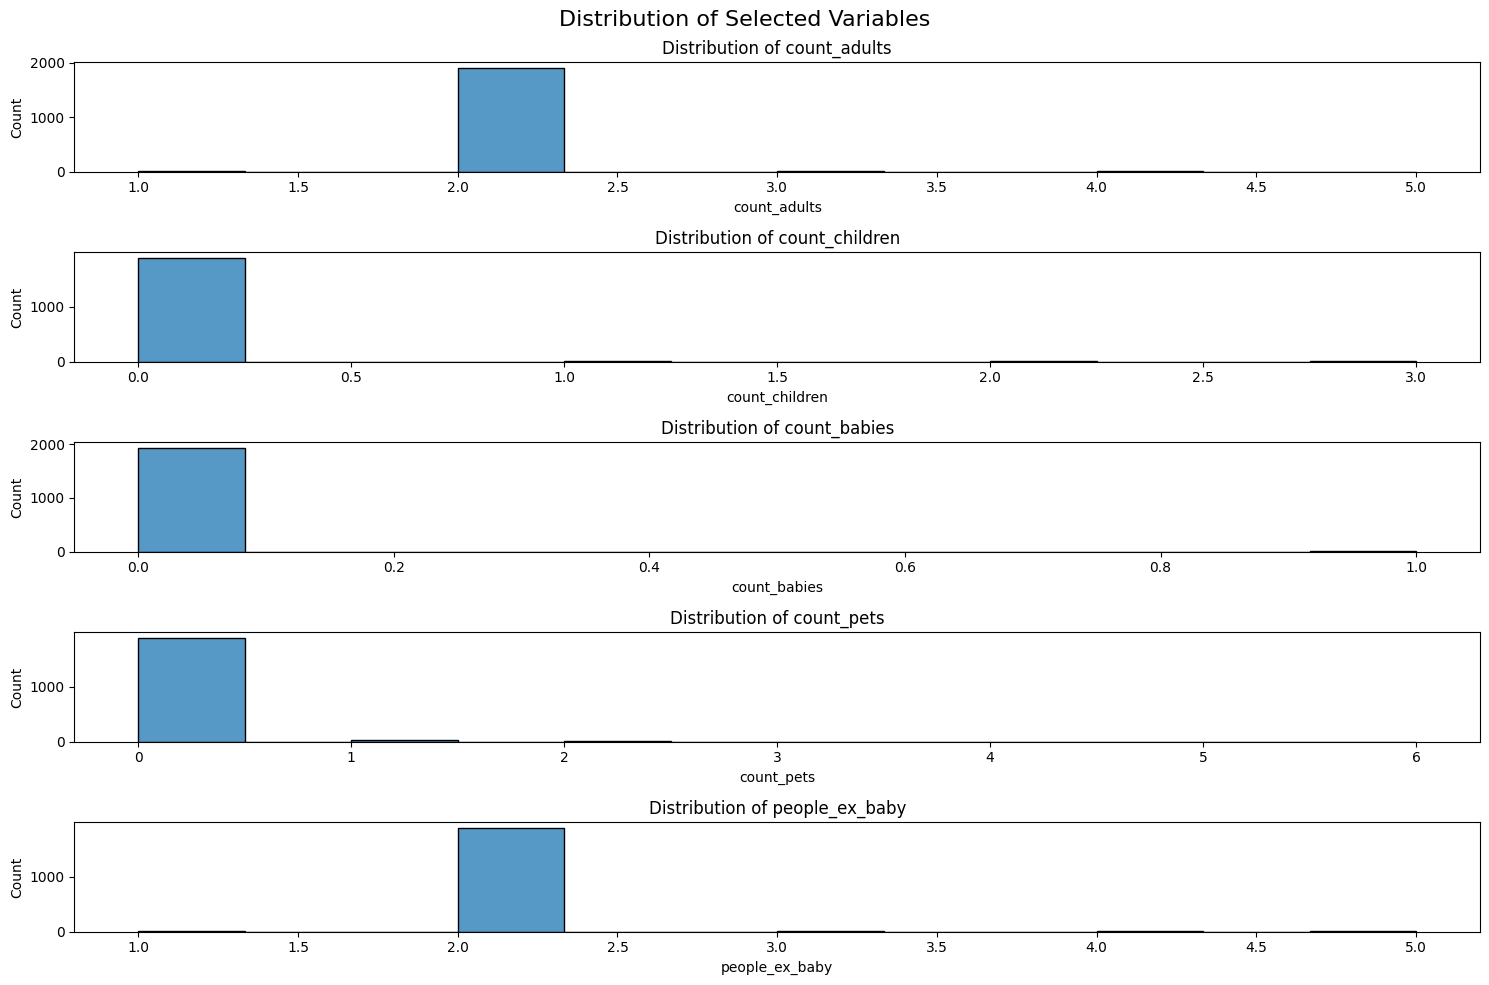


Descriptive statistics for selected variables:
       count_adults  count_children  count_babies  count_pets  people_ex_baby
count         976.0           976.0         976.0       976.0           976.0
mean            2.0             0.0           0.0         0.0             2.0
std             0.0             0.0           0.0         0.0             0.0
min             2.0             0.0           0.0         0.0             2.0
25%             2.0             0.0           0.0         0.0             2.0
50%             2.0             0.0           0.0         0.0             2.0
75%             2.0             0.0           0.0         0.0             2.0
max             2.0             0.0           0.0         0.0             2.0


In [17]:
selected_columns = [ 'count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby']

fig, axes = plt.subplots(len(selected_columns), figsize=(15, 10))
fig.suptitle('Distribution of Selected Variables', size=16)

axes = axes.ravel()

for idx, col in enumerate(selected_columns):
    sns.histplot(data=unique_recent_users, x=col, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}')
    axes[idx].set_xlabel(col)

plt.tight_layout()
plt.show()

print("\nDescriptive statistics for selected variables:")
print(most_recently_bought_products[selected_columns].describe())

<Axes: >

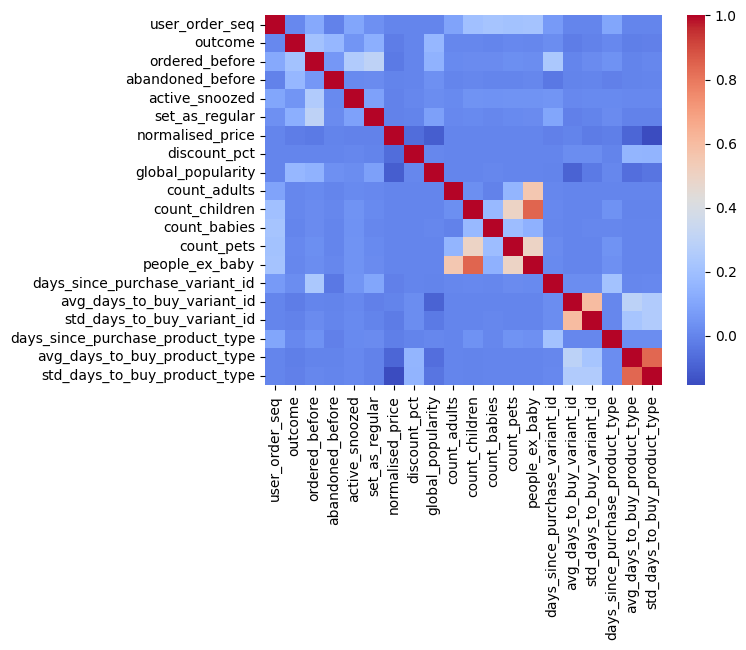

In [21]:
selected_columns = ['user_order_seq', 'outcome', 'ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular', 'normalised_price', 'discount_pct', 'global_popularity', 'count_adults', 'count_children', 'count_babies', 'count_pets', 'people_ex_baby', 'days_since_purchase_variant_id', 'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id', 'days_since_purchase_product_type', 'avg_days_to_buy_product_type', 'std_days_to_buy_product_type']
corr = dataset[selected_columns].corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm')

# Knowledge

- Some variables show a strange distribution.
- There is no relevant correlations between variables
- There are no missing values in the dataset.
- Product, user and order ID`s are defined as integers instead of strings. 